In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import PBMethods as PM

from IPython.display import clear_output

Total Collision: 10


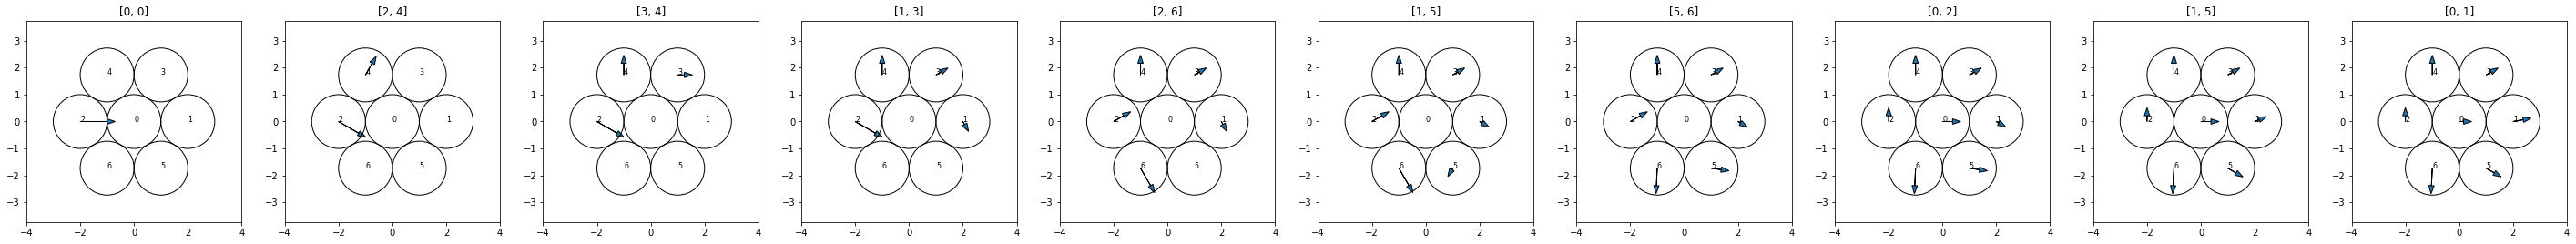

In [2]:
# input and setup
r = 1
center_x = np.array([0, 2, -2, 1, -1, 1, -1])
center_y = np.array([0, 0, 0, np.sqrt(3), np.sqrt(3), -np.sqrt(3), -np.sqrt(3)])
v_x = np.array([0, 0, 1, 0, 0, 0, 0])
v_y = np.array([0, 0, 0, 0, 0, 0, 0])
PM.pinned_random_model(center_x, center_y, v_x, v_y, r)

Total Collision: 4


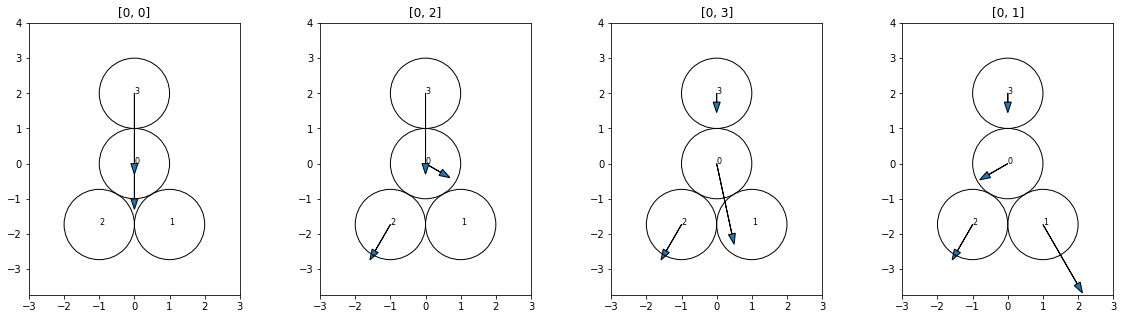

In [3]:
r = 1
center_x = [0, 1, -1, 0]
center_y = [0, -np.sqrt(3), -np.sqrt(3), 2]
v_x = [0, 0, 0, 0]
v_y = [-1, 0, 0, -2]
PM.pinned_random_model(center_x, center_y, v_x, v_y, r)

In [4]:
# setup_edgs with overlapping allowed. 
def rough_edges(center_x, center_y):
    edges = np.zeros((len(center_x), len(center_x)))

    # If ball n and ball m are touching, edges(n, m) = 1 only when n < m, else edges(n, m) = 0.
    # diagonal entries are automatically 0, as a ball is not allowed to collide with itself.
    for i in range(len(center_x)):
        for j in range(i, len(center_x)):
            x_i = np.array([center_x[i], center_y[i]])
            x_j = np.array([center_x[j], center_y[j]])
            if i != j:
                # allow an error of 1e-15 to accomodate for numerical error
                if np.linalg.norm(x_i-x_j) < (2*r + 1e-15):
                    edges[i, j] = 1
    return edges

# def pairwise_collidable(i, j, center_x, center_y, v_x, v_y, r):
#     if v_x[i] == 0:
# #         if i have no velocity, we skip, as i and j will be tested in both directions
#         if v_y[i] != 0:
# #             if i's velocity is vertical, the test case below should suffice
#             sameSign = (v_y[i] * (center_y[j]-center_y[i])) > 0
#             if i != j and np.abs(center_x[j]) < (2*r + 1e-15) and sameSign:
#                 return True    
#     elif v_x[j] == 0 and v_y[j] == 0:
# #         if j has no velocity, 
#         slope = v_y[i]/v_x[i]
#         distance = np.abs(-slope*center_x[j]+center_y[j]-center_y[i]+slope*center_x[i])/np.sqrt(slope**2+1)
#         if distance < (2*r + 1e-15):
#             return True
    
# # #     find hit point
# # #     We construct the trajectory of ball i and the center of ball j projected to the trajectory of ball i
# #     x_hit = (c3+slope * c4 + slope**2*c1-slope*c2)/(slope**2+1)
    

def pairwise_collidable(i, j, center_x, center_y, v_x, v_y, r):
#     find x coord for intersection of trajectory

# check when both balls have vertical trajectory
    x = 0
    x_s = 0
    x_e = 0
    t_s = 0
    t_e = 0
    moving_ball = 0
    target_ball = 0
    
    if v_x[i] == 0 and v_x[j] == 0:
#         both vertical, no collision. 
        if abs(center_x[i] - center_x[j]) > 2*r:
#             no collision: too far
            return False
        else:
#             giving in suitable distance
#             lower ball move up, higher ball move down faster, or two ball move toward each other. Can collied. Otherwise no collide
            return (v_y[i] - v_y[j])*(center_y[i] - center_y[j]) < 0
# if only one ball have vertical trajectory, collision will happen and must happen at that x value,
    elif v_x[i] == 0:
        s_j = v_y[j]/v_x[j]
        if v_y[i] == 0:
            distance = np.abs(-s_j*center_x[i]+center_y[i]-center_y[j]+s_j*center_x[j])/np.sqrt(s_j**2+1)
            return distance < 2*r
        x = center_x[i]
        x_s = x - np.sign(v_x[j])*np.sqrt(((2*r)**2)/(s_j**2+1))
        x_e = x + np.sign(v_x[j])*np.sqrt(((2*r)**2)/(s_j**2+1))
        t_s = (x_s-center_x[j])/v_x[j]
        t_e = (x_e-center_x[j])/v_x[j]
        moving_ball = i
        target_ball = j
        y_offset = np.sqrt(1/(1+1/s_j**2))
    
    elif v_x[j] == 0:
        s_i = v_y[i]/v_x[i]
        if v_y[j] == 0:
            distance = np.abs(-s_i*center_x[j]+center_y[j]-center_y[i]+s_i*center_x[i])/np.sqrt(s_i**2+1)
            return distance < 2*r
        x = center_x[j]
        x_s = x - np.sign(v_x[i])*np.sqrt(((2*r)**2)/(s_i**2+1))
        x_e = x + np.sign(v_x[i])*np.sqrt(((2*r)**2)/(s_i**2+1))
        t_s = (x_s-center_x[i])/v_x[i]
        t_e = (x_e-center_x[i])/v_x[i]
        moving_ball = j
        target_ball = i
        y_offset = np.sqrt(1/(1+1/s_i**2))
    
    else:
#         in this case, none have vertical trajectory, safe to compute slope
        s_i = v_y[i]/v_x[i]
        s_j = v_y[j]/v_x[j]
        
        if s_i == s_j:
#             if the two trajectories are parallel, check distance between line and direction of movement
#             much like in the first case. 

#             distance between the two trajectories
            d = abs(center_y[i] - center_y[j]) / ((s_i**2) + 1);
            if abs(d) > 2*r:
                return False
            else:
#             giving in suitable distance, test x velocity indicates the direction and speed the ball is moving at relatively to eachother.
                return (v_x[i] - v_x[j])*(center_x[i] - center_x[j]) < 0

#         if the two balls are not parallel, at least one have non-zero slope. 
        else:
            if s_i != 0:
#             two ball not parallel, not vertical. Find x value for intersection. 
                x = (s_j*(x-center_x[j]) + center_y[j]-center_y[i])/s_i+center_x[i]
    
            else:
#             two ball not parallel, not vertical. Find x value for intersection. 
                x = (s_i*(x-center_x[i]) + center_y[i]-center_y[j])/s_j+center_x[j]
            x_s = x - np.sign(v_x[i])*np.sqrt(((2*r)**2)/(s_i**2+1))
            x_e = x + np.sign(v_x[i])*np.sqrt(((2*r)**2)/(s_i**2+1))
            t_s = (x_s-center_x[i])/v_x[i]
            t_e = (x_e-center_x[i])/v_x[i]
            moving_ball = j
            target_ball = i
            y_offset = np.sqrt(((2*r)**2)/(1+1/s_i**2))
            
    return hit_tester(t_s, t_e, moving_ball, target_ball, y_offset, center_x, center_y, v_x, v_y, r)

def hit_tester(t_s, t_e, moving_ball, target_ball, y_offset, center_x, center_y, v_x, v_y, r):
    target_y = center_y[target_ball] + v_y[target_ball] * (t_s+t_e)/2 - y_offset*np.sign(v_y[target_ball])
    m_ys = center_y[moving_ball] + v_y[moving_ball] * t_s
    m_ye = center_y[moving_ball] + v_y[moving_ball] * t_e
    
    return (m_ys - target_y) * (m_ye - target_y) < 0

def collidable(center_x, center_y, v_x, v_y, r):
    for i in range(len(center_x)):
        for j in range(i+1, len(center_x)):
            if pairwise_collidable(i, j, center_x, center_y, v_x, v_y, r):
                print(i, ' ', j)
                return True
            
    return False

[0, 1]
False
[0, 2]
False
[0, 3]
False
[0, 4]
False
[1, 2]
False
[1, 3]
False
[1, 4]
False
[2, 3]
False
[2, 4]
True
[3, 4]
True


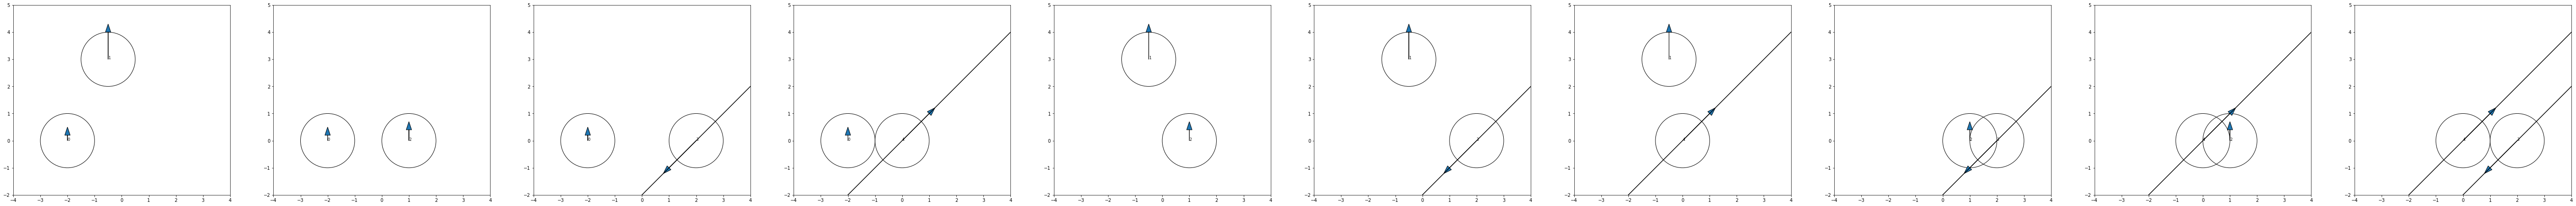

In [5]:
# some not-so-rigorous test for collidable
center_x = np.array([-2, -0.5, 1, 2, 0])
center_y = np.array([0, 3, 0, 0, 0])
v_x = np.array([0, 0, 0, -1, 1])
v_y = np.array([0.2, 1, 0.4, -1, 1])
r = 1
fig, ax = plt.subplots(1, 10, figsize=(100,10))

index = 0
for i in range(len(center_x)):
    for j in range(i+1, len(center_x)):
        print([i, j])
        print(pairwise_collidable(i, j, center_x, center_y, v_x, v_y, r))
        for k in [i, j]:
            origin = (center_x[k], center_y[k])
            v = (v_x[k], v_y[k])
            circle = plt.Circle(origin, r, fill = False)
            label = ax[index].annotate(k, xy = origin, fontsize=8)
            if v_x[k] != 0 or v_y[k] != 0:
                ax[index].arrow(center_x[k], center_y[k], v_x[k], v_y[k], head_width = 0.2)
            ax[index].add_patch(circle)
            if v_x[k] != 0:
                ax[index].axline((center_x[k], center_y[k]), slope=v_y[k]/v_x[k], color='k')

        ax[index].set_xlim([min(center_x) - 2, max(center_x) + 2])
        ax[index].set_ylim([min(center_y) - 2, max(center_y) + 2])
        ax[index].set_aspect('equal')
        index += 1

In [6]:
r = 1
delta = 0.01
center_x = np.array([0, 2, 1])
center_y = np.array([0, 0, -np.sqrt(3)])
v_x = np.array([0, 0, 0])
v_y = np.array([0, 0, 1])
v_xs = [v_x]
v_ys = [v_y]
step = [[0, 0]]
print('collide', collidable(center_x, center_y, v_x, v_y, r))

edges = rough_edges(center_x, center_y)
collide = PM.all_collision(edges, center_x, center_y, v_x, v_y, r)

v_x2, v_y2 = PM.perform_collision(collide[0][0], collide[0][1], edges, center_x, center_y, v_x, v_y)

v_xs.append(v_x2)
v_ys.append(v_y2)
step.append([[collide[0][0], collide[0][1]]])

v_x = v_x2
v_y = v_y2

print('collide', collidable(center_x, center_y, v_x, v_y, r))

edges = rough_edges(center_x, center_y)
collide = PM.all_collision(edges, center_x, center_y, v_x, v_y, r)

v_x2, v_y2 = PM.perform_collision(collide[0][0], collide[0][1], edges, center_x, center_y, v_x, v_y)

v_xs.append(v_x2)
v_ys.append(v_y2)
step.append([[collide[0][0], collide[0][1]]])

v_x = v_x2
v_y = v_y2

print('collide', collidable(center_x, center_y, v_x, v_y, r))

0   2
collide True
0   1
collide True
collide False


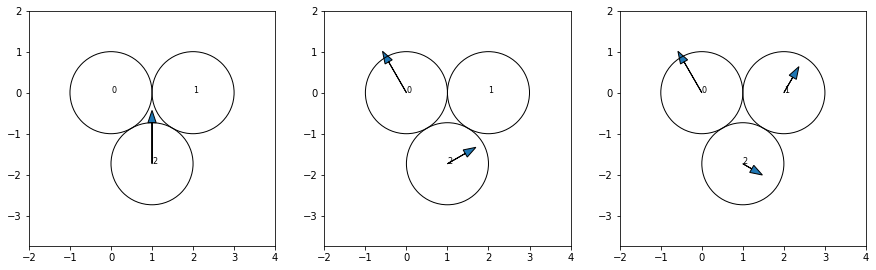

In [7]:
fig, ax = plt.subplots(1, len(step), figsize = (len(step)*5, 5))
for i in range(len(step)):
    PM.visualize(center_x, center_y, v_xs[i], v_ys[i], r, ax[i])

0   2
0   2
0   2
0   2
0   2
0   2
0   1
0   1
0   1
0   1
0   1
0   1
0   1


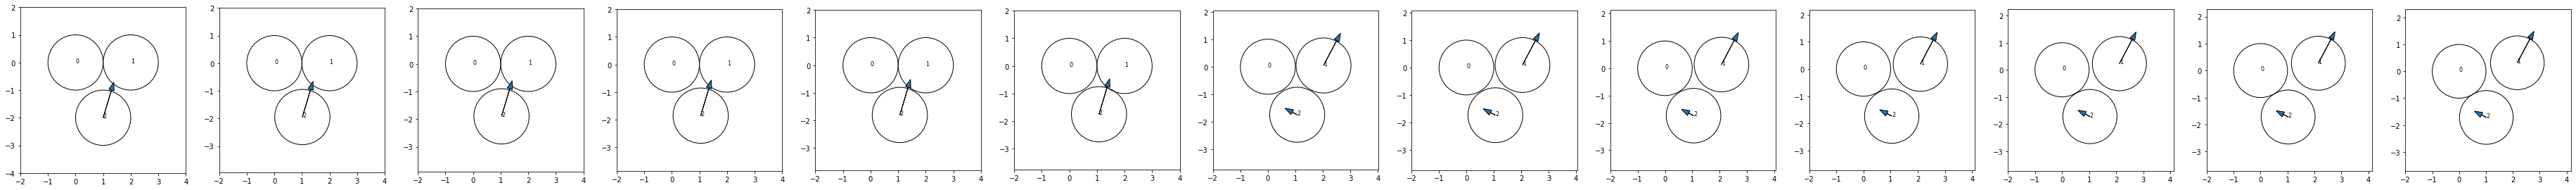

In [8]:
r = 1
delta = 0.01
center_x = np.array([0, 2, 1])
center_y = np.array([0, 0, -2])
v_x = np.array([0, 0, 0.3])
v_y = np.array([0, 0, 1])
xs = [center_x]
ys = [center_y]

this_x = np.copy(v_x).astype('float64')
this_y = np.copy(v_y).astype('float64')
v_xs = [this_x]
v_ys = [this_y]

step = 0
resolution = 0.05
while collidable(center_x, center_y, this_x, this_y, r) and step < 20:
#     collide
    edges = rough_edges(center_x, center_y)
    collide = PM.all_collision(edges, center_x, center_y, v_x, v_y, r)

    if len(collide) > 0:
        i = collide[0][0]
        j = collide[0][1]
        this_x, this_y = PM.perform_collision(i, j, edges, center_x, center_y, this_x, this_y)
    
#     move
    
    v_xs.append(this_x)
    v_ys.append(this_y)
    step += 1
    center_x = this_x*resolution + center_x
    center_y = this_y*resolution + center_y
    xs.append(center_x)
    ys.append(center_y)
        
fig, ax = plt.subplots(1, step, figsize = (step*5, 5))
for i in range(step):
    PM.visualize(xs[i], ys[i], v_xs[i], v_ys[i], r, ax[i])